**1. Import libraries and read dataset**

In [1]:
import pandas as pd

dataset_path = '/content/opsd_germany_daily.csv'

# Read data form .csv file
opsd_daily = pd.read_csv(dataset_path)

print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head(3)


(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


Đối với dạng dữ liệu Time Series, ta có thể chọn cột Date làm index (vì giá trị cột này trong bộ
dữ liệu luôn là duy nhất (unique)):

In [2]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


Ta có thể thực hiện lại bước load file và lúc này, chỉ định cột sẽ làm chỉ mục ngay từ lúc thực
hiện lời gọi hàm, đồng thời tạo thêm các số cột Year, Month, Weekday trích từ cột Date để
thuận tiện cho việc xử lý một số bước về sau:

In [3]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col = 0, parse_dates = True)

# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


**2. Time-based indexing**

Một trong những tính năng nổi trội của pandas khi xử lý dữ liệu time
series là tính năng time-based indexing, liên quan đến việc dùng dates và times để tổ chức và truy
cập dữ liệu (khá giống với Indexing ở phần trước nhưng giá trị lúc này sẽ là ngày tháng năm).
Việc này cho phép ta dùng loc accessor để thực thi. Ví dụ, ta có thể truy cập dữ liệu theo một
khoảng thời gian từ ngày 2014-01-20 đến ngày 2014-01-22:

In [4]:
opsd_daily.loc['2014-01-20':'2014-01-22']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


Một tính năng khác của pandas là partial-string indexing, cho phép ta Slicing theo mô tả thời
gian một cách chung chung, không cần cụ thể ngày tháng năm như ở phần trên. Ví dụ:

In [5]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


**3. Visualizing time series data**

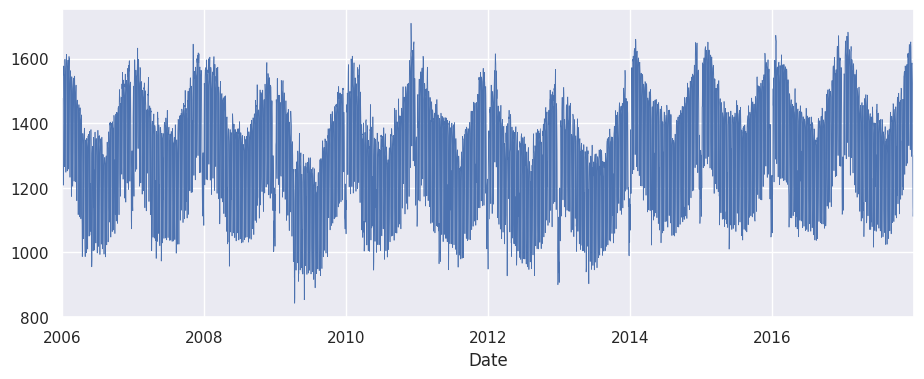

In [6]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot(linewidth=0.5);

Ta có thể plot cùng lúc một số cột dữ liệu khác thành từng đồ thị riêng lẻ:

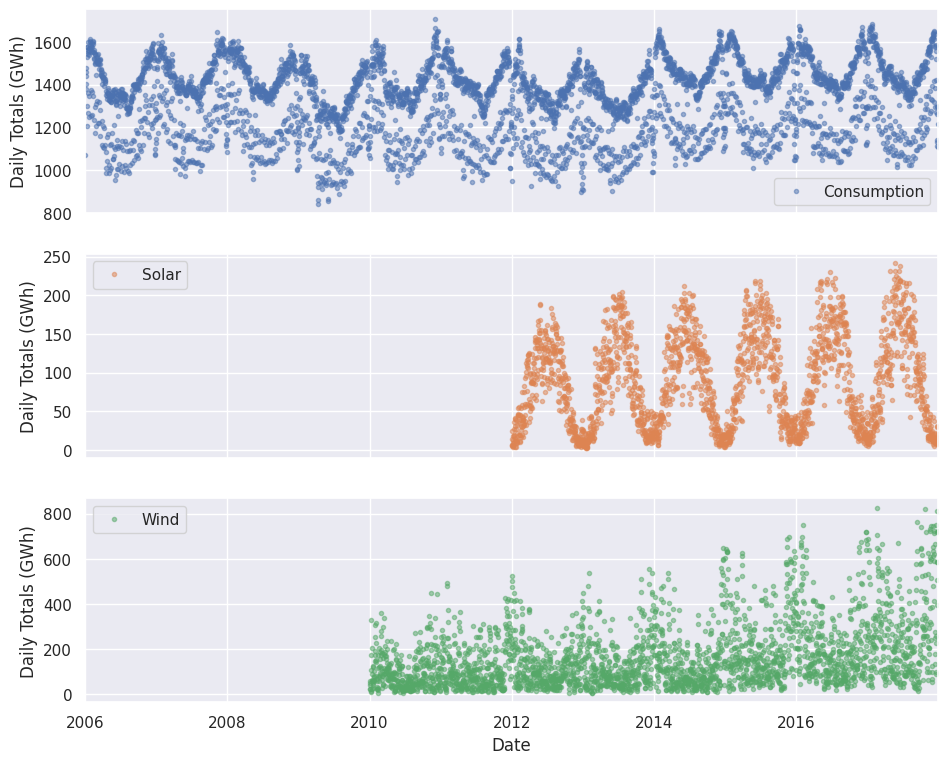

In [7]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',
    figsize=(11 , 9), subplots = True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()

**4. Seasonality**

Tạm dịch: tính thời vụ. Chỉ số về các đặc trưng lặp đi lặp lại trong một khoảng
thời gian cố định xuyên suốt các năm. Các dạng đặc trưng này thường được ảnh hưởng bởi rất
nhiều yếu tố khác nhau. Ở trong dữ liệu của bài, ta có thể khai phá tính thời vụ của dữ liệu, dùng
seaborn để vẽ, và group dữ liệu thành từng nhóm như sau:

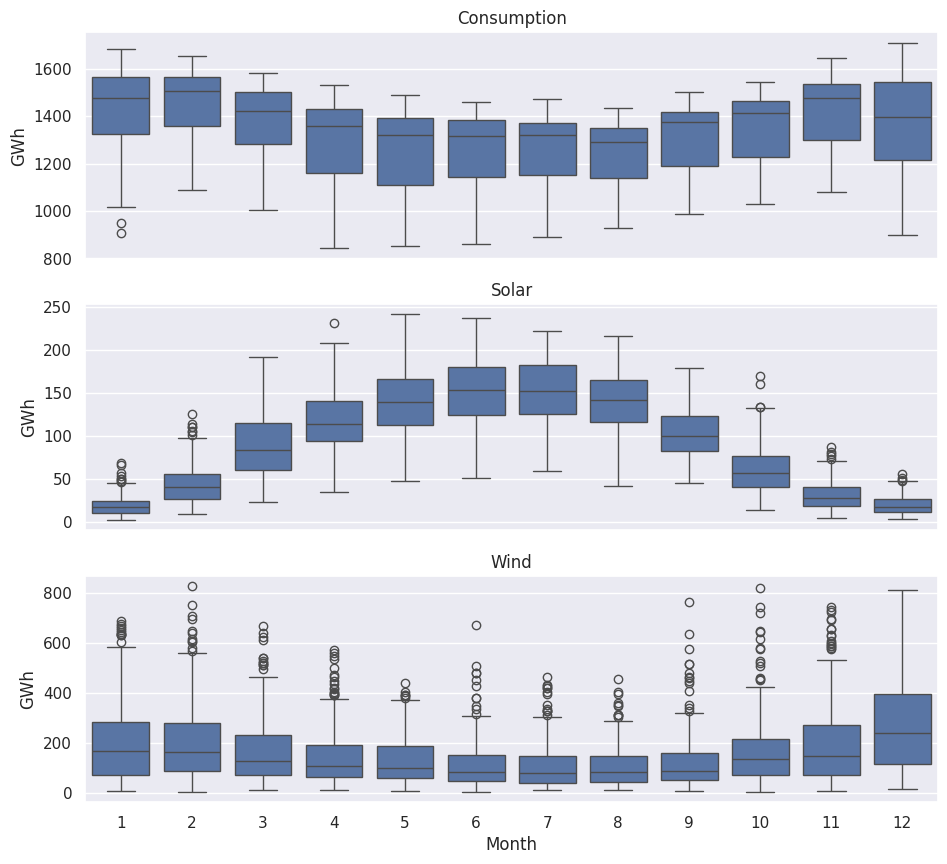

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(11 , 10), sharex = True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

**5. Frequencies**

Trong DatetimeIndex của pandas, ta có thể sử dụng các giá trị thời gian sẵn có
để tạo thành một chuỗi giá trị theo tần suất. Ví dụ, với hai giá trị ’1998-03-10’ và ’1998-03-14’,
ta có thể tạo một danh sách thời gian với tần suất theo ngày. Tức danh sách mới của chúng ta
trở thành: ’1998-03-10’, ’1998-03-11’, ’1998-03-12’, ’1998-03-13’, ’1998-03-14’. Việc này được thực
hiện bằng cách cài đặt thuộc tính ’freq’.


In [9]:
pd.date_range('1998-03-10', '1998-03-15', freq ='D')


DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# To select an arbitrary sequence of date / time values from a pandas time series ,
# we need to use a DatetimeIndex , rather than simply a list of date / time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [11]:
# Convert the data to daily frequency , without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method ='ffill')
consum_freq


,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


**6. Resampling**

Là kỹ thuật dùng để thay đổi tần số biểu diễn của bộ dữ liệu time series, có thể
gia tăng hoặc giảm đi tần số lấy mẫu. Ví dụ, ta có thể giảm tần số của bộ dữ liệu hiện tại từ ngày
sang tháng. Điều này đồng nghĩa với việc bộ dữ liệu mới của chúng ta sẽ có ít mẫu dữ liệu hơn
bản gốc.


In [12]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency , aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [13]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])


4383
627


Ta visualize daily và weekly time series của Solar trong 6 tháng như sau:


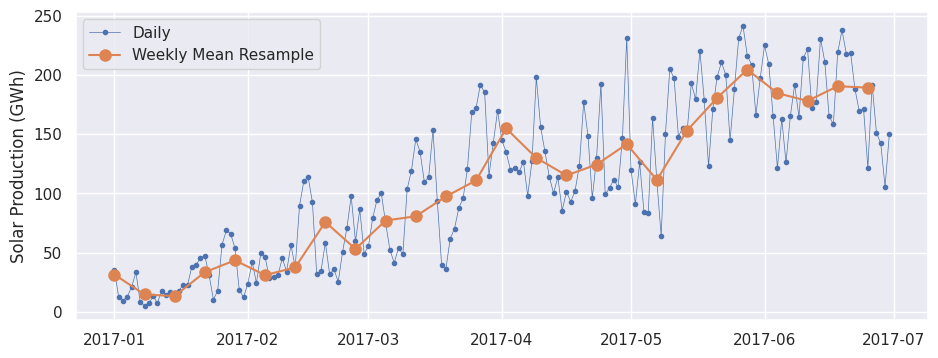

In [14]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()


In [15]:
# Compute the annual sums, setting the value to NaN for any year which has fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# (’2006-12-31’, ’2007-12-31’, etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)



,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

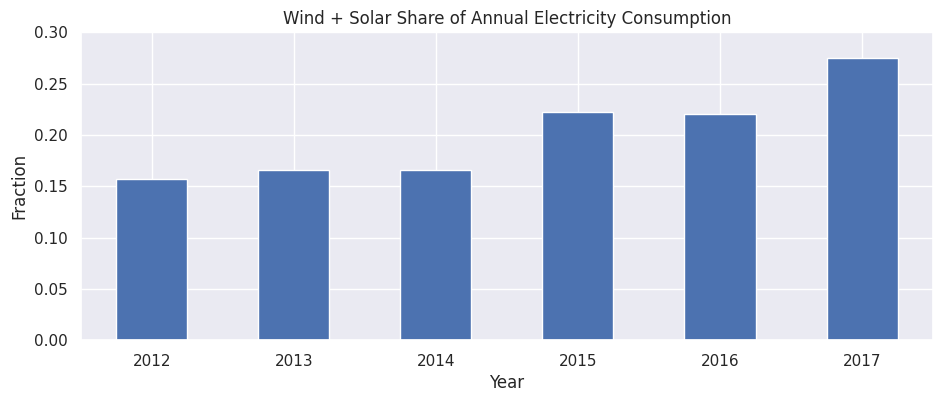

In [16]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)


**7. Rolling windows**

In [17]:
# Compute the centered 7- day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center = True).mean()
opsd_7d.head(10)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


**8. Trends**

Là một đặc trưng chỉ xu hướng của dữ liệu, có thể tăng hoặc giảm đi trong một khoảng
thời gian dài. Với kỹ thuật rolling windows, ta có thể dễ dàng trực quan hóa trends của bộ dữ
liệu, tại các time scales khác nhau. Ví dụ, ta tính 365-day rolling mean:


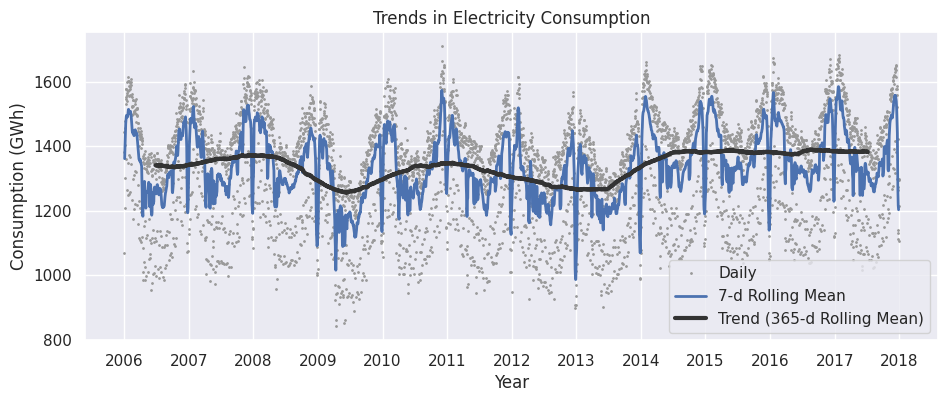

In [18]:
import matplotlib.dates as mdates

# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

# Plot daily , 7 -day rolling mean , and 365 - day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6', linestyle ='None', label ='Daily')
ax.plot(opsd_7d['Consumption'], linewidth =2, label ='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color ='0.2', linewidth=3 , label ='Trend (365-d Rolling Mean)')
# Set x- ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()


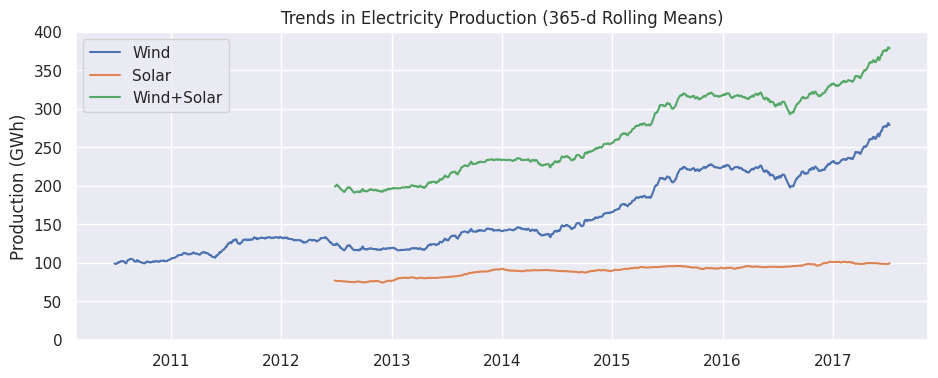

In [19]:
# Plot 365 - day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x- ticks to yearly interval , adjust y- axis limits , add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0 , 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')
plt.show()
